In [36]:
import pandas as pd #importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
trainset= pd.read_csv("C:/Users/Aaliyah Ahmed/Downloads/train.csv") #loading the datasets; train as trainset and test as testset
testset= pd.read_csv("C:/Users/Aaliyah Ahmed/Downloads/test.csv")

In [38]:
trainset.head(20) #printing the first 20 rows only of the train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [39]:
testset.head(20) #printing the first 20 rows only of the testset

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [40]:
trainset['Age'] = trainset['Age'].fillna(trainset['Age'].mode()[0]) #filling missing values in Age of trainset with  the mode
trainset['Age'].isnull().values.any() #displays False if there are no missing values in Age and vice versa

False

In [41]:
testset['Age'] = testset['Age'].fillna(testset['Age'].mode()[0]) #filling missing values in Age of testset with  the mode
testset['Age'].isnull().values.any() #displays False if there are no missing values in Age and vice versa

False

In [42]:
from sklearn.preprocessing import LabelEncoder #to change string to numerical values in Sex
labelEncoder_trainset = LabelEncoder()
trainset.Sex=labelEncoder_trainset.fit_transform(trainset.Sex)

In [43]:
labelEncoder_testset = LabelEncoder()
testset.Sex=labelEncoder_testset.fit_transform(testset.Sex)

In [44]:
trainset.isnull().sum() #to display the number of missing values in each column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [45]:
testset.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [46]:
trainset.loc[trainset["Embarked"]=="S","Embarked"] =0 #assigning numerical values to each place
trainset.loc[trainset["Embarked"]=="C","Embarked"] =1
trainset.loc[trainset["Embarked"]=="Q","Embarked"] =2

In [47]:
testset.loc[testset["Embarked"]=="S","Embarked"] =0
testset.loc[testset["Embarked"]=="C","Embarked"] =1
testset.loc[testset["Embarked"]=="Q","Embarked"] =2

In [48]:
trainset['Embarked'] = trainset['Embarked'].fillna(trainset['Age'].mode()[0]) #filling missing value in Embarked with mode

In [49]:
testset['Fare']=testset['Fare'].fillna(testset['Fare'].mean()) #filling missing Fare with avg value

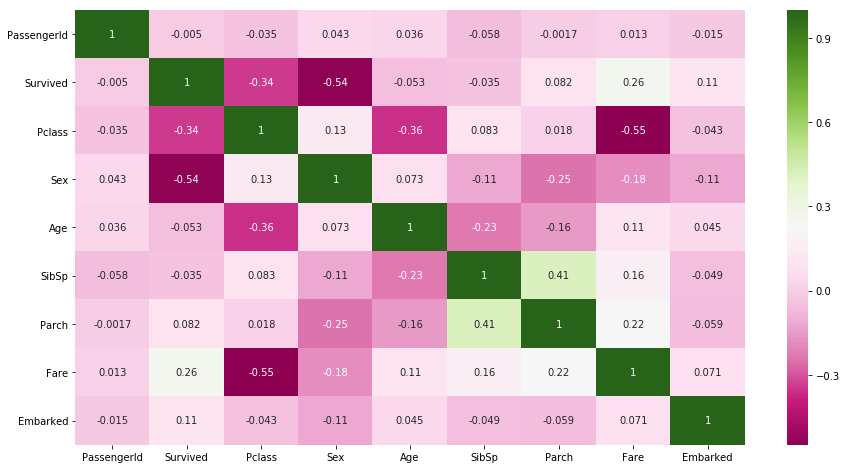

In [138]:
plt.subplots(figsize = (15,8))
sns.heatmap(trainset.corr(), annot=True,cmap="PiYG")

In [51]:
trainset = trainset.drop('Name',axis=1) #dropping the unnecessary features in each dataset
trainset = trainset.drop('Ticket',axis=1)
trainset = trainset.drop('Cabin',axis=1)

testset = testset.drop('Name',axis=1)
testset = testset.drop('Ticket',axis=1)
testset = testset.drop('Cabin',axis=1)

In [52]:
trainset.isnull().sum().sum() #shows total missing values

0

In [53]:
testset.isnull().sum().sum()

0

In [120]:
new_col = ["Age","Sex","Embarked","Pclass","Fare","SibSp","Parch"] #to implement the model
x_train = dataset[new_col]
y_train = dataset["Survived"]
x_test  = testset.drop("PassengerId", axis=1).copy()

In [121]:
knn = KNeighborsClassifier(n_neighbors=3) #KNN, as 3 gives max accuracy
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
knn.score(x_train, y_train)

0.8383838383838383

In [87]:
acc_knn = round(knn.score(x_train, y_train) * 100, 2) #to print accuracy in percentage
print(round(acc_knn,2,), "%")

83.84 %
